C:\Users\Miras\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log2


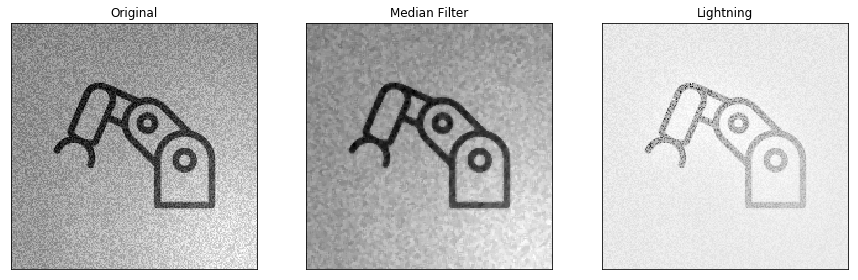

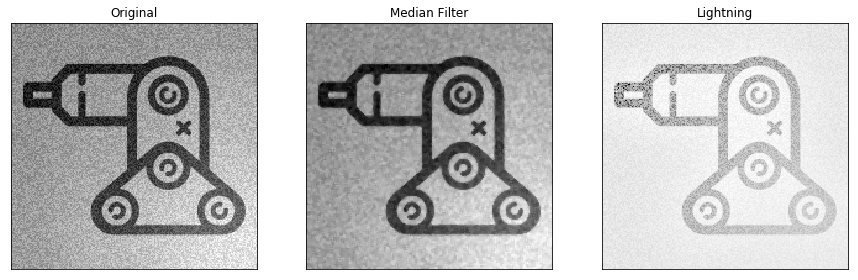

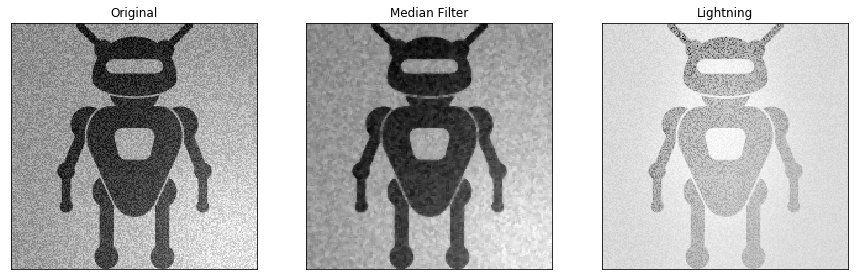

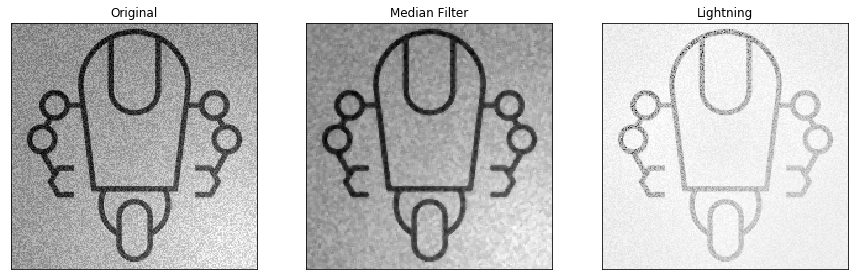

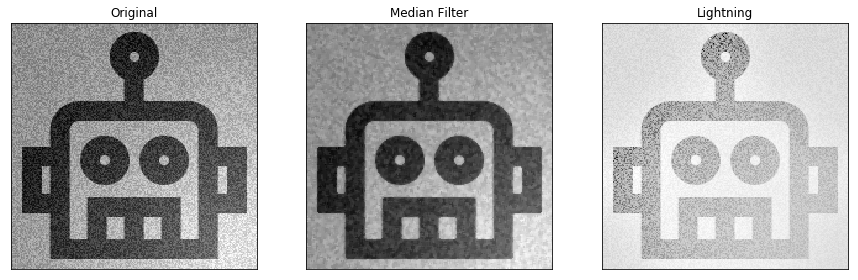

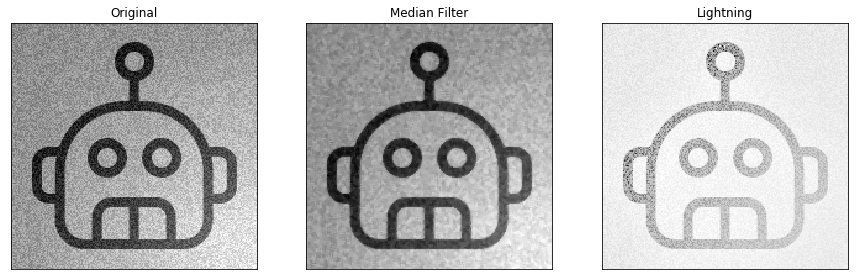

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import sys
from scipy import ndimage as nimg

img1 = img.imread("data2/Arms/4.png")
img2 = img.imread("data2/Arms/127.png")
img3 = img.imread("data2/Figure_normal_legs/1.png")
img4 = img.imread("data2/FigureWheels/22.png")
img5 = img.imread("data2/Head/0.png")
img6 = img.imread("data2/Head/2.png")



def filterize (img):
    mflt = nimg.median_filter(img, 3)
    fig = plt.figure(figsize=(15, 10))
    plt.subplot(131), plt.imshow(img, cmap="gray"), plt.title("Original"), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(mflt, cmap="gray"), plt.title("Median Filter"), plt.xticks([]), plt.yticks([])
    
    gflt = nimg.gaussian_filter(img, sigma=20)
    MAX = (img-gflt).max();
    MIN = (img-gflt).min();
    sub = np.log2(img)-np.log2(gflt);
    newImage = (sub-MIN)/(MAX-MIN)
    plt.subplot(133), plt.imshow(newImage,cmap='gray'), plt.title("Lightning"), plt.xticks([]), plt.yticks([])

    plt.show()

filterize(img1)
filterize(img2)
filterize(img3)
filterize(img4)
filterize(img5)
filterize(img6)

    

In [16]:
from sklearn.model_selection import train_test_split
from PIL import Image


folders = [
    r'.\\data2\\Arms\\',
    r'.\\data2\\Figure_normal_legs\\',
    r'.\\data2\\FigureWheels\\',
    r'.\\data2\\Head\\'
]

pixel_depth = 255.0
image_size = 50
size = image_size, image_size

def load_images(folder):
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  cnt = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[cnt, :, :] = image_data
      cnt = cnt + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:cnt, :, :]
    
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_images(folder))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)


In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]

model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_trains, Y_trains, epochs=10, batch_size=10)

results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)

print(results)

C:\Users\Miras\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
C:\Users\Miras\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
C:\Users\Miras\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, activation="relu", kernel_initializer="uniform")`
C:\Users\Miras\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_11 (Dense)             (None, 1250)              3126250   
_________________________________________________________________
dense_12 (Dense)             (None, 2500)              3127500   
_________________________________________________________________
output (Dense)               (None, 4)                 10004     
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total params: 12,516,254
Trainable params: 12,516,254
Non-trainable params: 0
________________________________________________________________